# Aplikativnost CMP

Cilj: Napisite celosten robotski program, ki iz zacetne lege najprej pobere rocko in jo premakne na koncno lego

1. Zajemite trajektorijo, ki pobere in odloži ročko.

2. Izvedite DMP togo (brez ročke) in narišite.

3. Izvedite DMP togo (z ročko) in narišite.

4. Zajemite navore brez ročke in izvedite CMP podajno in narišite.

5. Izvedite isti CMP z ročko ter narišite trajektorijo in napako.

6. Zajemite navore z ročko ter narišite trajektorijo in napako.

7. Spremenite gib s spremembo cilja trajektorije ter izvedite CMP.

8. Narišite trajektorijo in napako.

9. Primerjajte vse napake izvedbe in podajte zaključke glede CMP.

Skupaj z Andrejem in Mihom se dogovorite za samostojni seminar.

In [1]:
import rospy
import inspect
import numpy as np
import time
from robotblockset.graphics import plotjtraj
import matplotlib.pyplot as plt
from utils import SoftSetJointCompliance
from dmp import DMP
from tp import*



from robotblockset.ros.grippers_ros import PandaGripper
from importlib import reload
import example_data_recorder
#reload(example_data_recorder)
from utils import SoftSetJointCompliance
ns = "pingvin_2"
rospy.init_node(ns)
from robotblockset.ros.franka import panda_ros
r = panda_ros(ns=ns, control_strategy="JointImpedance", init_node=False)
g = PandaGripper(namespace=ns,robot=r)
import csv

Make sure that ROS node is initialized outside
Panda::Initialized
Panda:Gripper:ROS:Created


In [2]:
def record_robot_state(robot, frequency, duration):
    interval = 1.0 / frequency
    
    N=int(frequency*duration)
    tt = np.zeros((N,1))
    qt = np.zeros((N,r.nj))
    dqt = np.zeros((N,r.nj))
    xt = np.zeros((N,r.nj))

    i = 0
    start_time = time.monotonic()
    end_time = start_time + duration
    
    last_update = time.monotonic()

    while time.monotonic() <= end_time+interval and i < N:
        t = time.monotonic()
        if t - last_update >= interval:
            
            # Get robot state
            state = robot.GetState()
            xt[i] = robot.x
            tt[i] = t-start_time
            qt[i] = robot.q
            dqt[i] = robot.qdot

            # Update the last recorded time
            last_update = t
            i += 1
        
    return xt, tt, qt, dqt, i, N   

In [18]:
with open('above.csv', mode = 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(qt_above)
    writer.writerow(qt_handle)

In [153]:
r.ErrorRecovery()

Panda::Recovering from errors:
 ['cartesian_reflex', 'joint_velocity_violation']
Panda::Attempting to change robot mode from 4


0

In [154]:
r.SetJointCompliant()

:Joint compliance changed 
Stiff:[0. 0. 0. 0. 0. 0. 0.]
Damp:[0. 0. 0. 0. 0. 0. 0.]
shutdown request: [/pingvin_2] Reason: new node registered with same name


In [99]:
r.ResetCurrentTarget()
SoftSetJointCompliance(r,r._franka_default.JointCompliance.K,4)
r.SetJointStiff()

:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.    0.    0.    0.]
Damp:[25 25 25 25 10 10 10]
:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.  250.  250.  100.]
Damp:[25. 25. 25. 25. 10. 10. 10.]


In [12]:
qt_above = qt[0]
print(qt_above)

[ 0.15631599  0.19180894 -0.53681163 -2.15393866  0.08999193  2.29585597
  0.35275991]


In [98]:
r.JMove(qt_above, 3)


0

In [48]:
qt_handle = qt[499]
print(qt_handle)

[ 0.15500795  0.49536673 -0.50755696 -2.17813877  0.21984512  2.64763625
  0.3129592 ]


In [88]:
r.JMove(qt_handle, 3)

0

In [3]:
r.SetJointCompliant()
print("START")
xt, tt, qt, dqt, i, N = record_robot_state(r,100,5)

print("STOP")

:Joint compliance changed 
Stiff:[0. 0. 0. 0. 0. 0. 0.]
Damp:[0. 0. 0. 0. 0. 0. 0.]
START
STOP


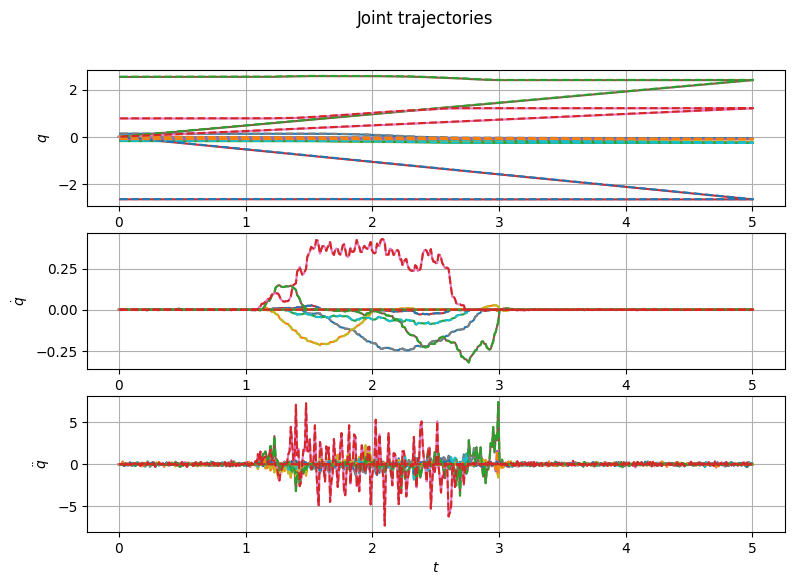

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(9, 6))
fig.suptitle('Joint trajectories')
plotjtraj(tt, qt, dqt, ax=ax);
plotjtraj(tt, qt+0.01, dqt, ax=ax, linestyle="--");

In [12]:
print(qt.shape)

(500, 7)
ERROR! Session/line number was not unique in database. History logging moved to new session 112


In [13]:
print(qt2[0])

[ 0.11429151  0.44392161 -0.48377901 -2.24111873  0.2128981   2.67801237
  0.25739113]


In [24]:
r.ResetCurrentTarget()
SoftSetJointCompliance(r,r._franka_default.JointCompliance.K,4)

r.JMove(qt[0], 3)

:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.    0.    0.    0.]
Damp:[25 25 25 25 10 10 10]


0

In [120]:
g.Close()

1

In [121]:
g.Open()

1

In [90]:
r.SetJointCompliant()
print("START")
xt2, tt2, qt2, dqt2, i2, N2 = record_robot_state(r,100,8)

print("STOP")

:Joint compliance changed 
Stiff:[0. 0. 0. 0. 0. 0. 0.]
Damp:[0. 0. 0. 0. 0. 0. 0.]
START
STOP


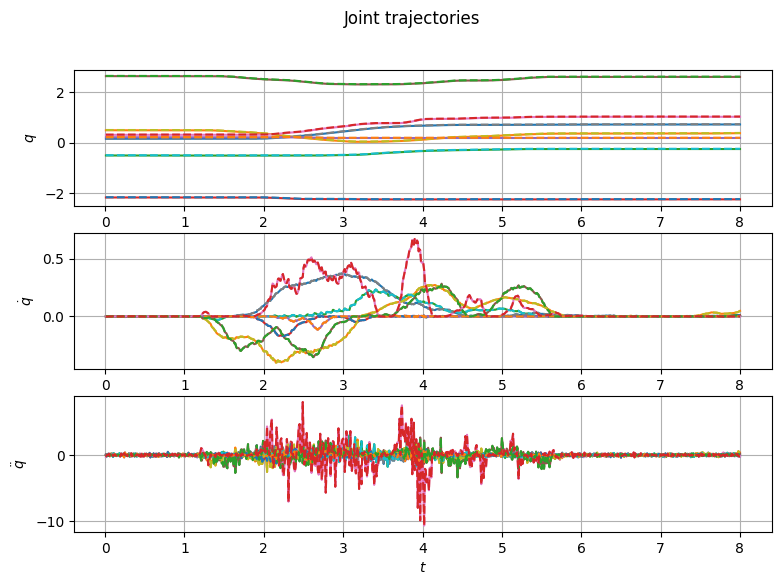

In [91]:
fig, ax = plt.subplots(3, 1, figsize=(9, 6))
fig.suptitle('Joint trajectories')
plotjtraj(tt2, qt2, dqt2, ax=ax);
plotjtraj(tt2, qt2+0.01, dqt2, ax=ax, linestyle="--");

In [92]:
r.ResetCurrentTarget()
SoftSetJointCompliance(r,r._franka_default.JointCompliance.K,4)

:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.    0.    0.    0.]
Damp:[25 25 25 25 10 10 10]


In [6]:
d = DMP(qt.copy(),np.squeeze(tt.copy()),vel_data=dqt.copy(),num_weights=25)

LinAlgError: SVD did not converge in Linear Least Squares

shutdown request: [/pingvin_2] Reason: new node registered with same name


In [94]:
trj_dec,t_dec=d.decode()

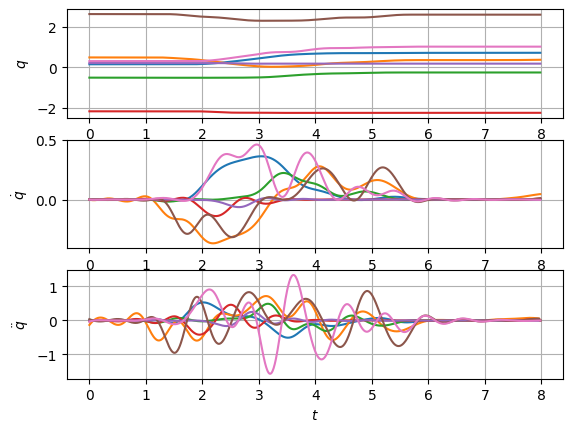

In [95]:
plotjtraj(qt=trj_dec, t=t_dec);

In [27]:
r.JMove(trj_dec[0],5)
i = 0
trq = np.zeros_like(trj_dec)
for q in trj_dec: 
    r.GoTo_q(q,np.zeros(7),np.zeros(7),0)
    trq[i] = np.array(r.state.tau_J_d) #new line to store trqs
    i += 1
    time.sleep(1/100.)

ValueError: x and y must have same first dimension, but have shapes (799,) and (499, 7)

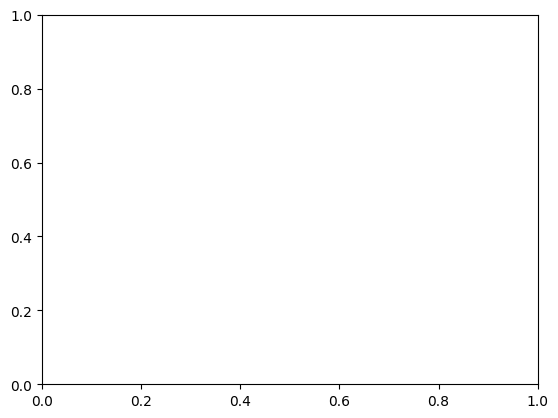

In [96]:
plt.plot(t_dec, trq)
plt.show()

In [33]:
def above(robot, position):
    robot.JMove(position, 3)

In [100]:
def dmp_move(r,qt_above, qt_handle, trj_dec, q):

    g.Open()
    
    r.ResetCurrentTarget()
    SoftSetJointCompliance(r,r._franka_default.JointCompliance.K,4)
    r.SetJointStiff()
    
    above(r, qt_above)
    above(r, qt_handle)
    g.Close()

    r.JMove(trj_dec[0],2)
    i = 0
    trq = np.zeros_like(trj_dec)
    for q in trj_dec: 
        r.GoTo_q(q,np.zeros(7),np.zeros(7),0)
        trq[i] = np.array(r.state.tau_J_d) #new line to store trqs
        i += 1
        time.sleep(1/100.)
        
    return trq

In [101]:
trq = dmp_move(r,qt_above, qt_handle, trj_dec, q)

:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.  250.  250.  100.]
Damp:[25 25 25 25 10 10 10]
:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.  250.  250.  100.]
Damp:[25. 25. 25. 25. 10. 10. 10.]


In [102]:
print(trq.shape)

(799, 7)


In [105]:
trq1 = (np.vstack((np.zeros((1,7)),trq)))

In [109]:
print(tt2.shape)

(800, 1)


In [110]:
tp = TP(trq1.copy(), np.squeeze(tt2.copy()), num_weights=200)

In [111]:
trq_dec, trq_t = tp.decode()

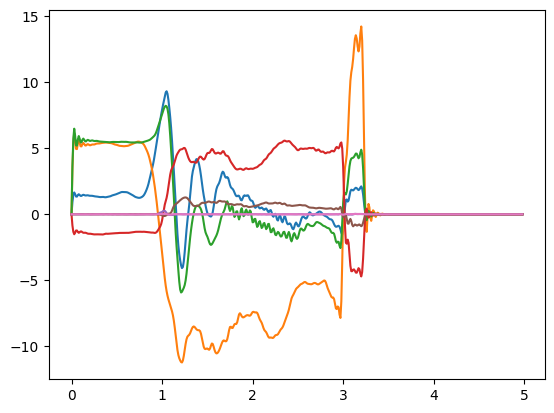

In [71]:
plt.plot(trq_t, trq_dec)
plt.show()

In [61]:
r.SetJointSoft(0.05)

:Joint compliance changed 
Stiff:[60.  60.  60.  60.  12.5 12.5  5. ]
Damp:[1.25 1.25 1.25 1.25 0.5  0.5  0.5 ]


In [66]:
g.Open()

1

In [145]:
g.Open()

r.ResetCurrentTarget()
SoftSetJointCompliance(r,r._franka_default.JointCompliance.K,4)
r.SetJointStiff()

above(r, qt_above)
above(r, qt_handle)
g.Close()

r.JMove(trj_dec[0],2)
r.SetJointSoft(0.1)
i = 0
qTestCMP = np.zeros_like(trj_dec)
for q in trj_dec: 
    r.GoTo_q(q,np.zeros(7),trq_dec[i],0)
    qTestCMP[i] = np.array(r.q) #new line to store qs
    i += 1
    time.sleep(1/100.)

[ERROR] [1744114274.854198]: Got a transition callback on a goal handle that we're not tracking


:Joint compliance changed 
Stiff:[120. 120. 120. 120.  25.  25.  10.]
Damp:[25 25 25 25 10 10 10]
:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.  250.  250.  100.]
Damp:[25. 25. 25. 25. 10. 10. 10.]
:Joint compliance changed 
Stiff:[120. 120. 120. 120.  25.  25.  10.]
Damp:[2.5 2.5 2.5 2.5 1.  1.  1. ]


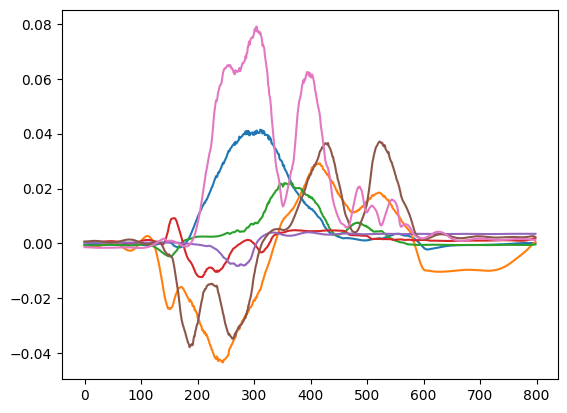

In [142]:
plt.plot(trj_dec-qTestCMP)

In [124]:
d2 = DMP(qt2.copy(),np.squeeze(tt2.copy()),vel_data=dqt2.copy(),num_weights=25)

In [132]:
d2.goal = d2.goal + [0,0,0.1,0,0,0,0]

In [133]:
print(d2.goal.shape)

(7,)


In [134]:
trj_dec2,t_dec2=d2.decode()

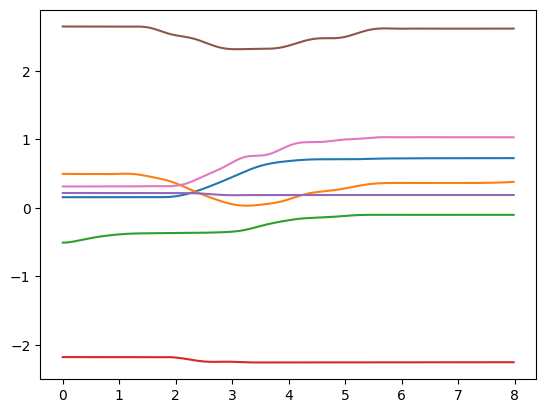

In [135]:
plt.plot(t_dec2, trj_dec2)
plt.show()

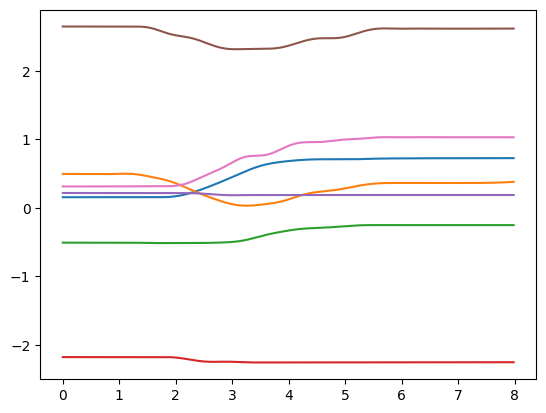

In [131]:
plt.plot(t_dec, trj_dec)
plt.show()

In [147]:
g.Open()

r.ResetCurrentTarget()
SoftSetJointCompliance(r,r._franka_default.JointCompliance.K,4)
r.SetJointStiff()

above(r, qt_above)
above(r, qt_handle)
g.Close()

r.JMove(trj_dec[0],2)
r.SetJointSoft(0.1)
i = 0
qTestCMP2 = np.zeros_like(trj_dec)
for q in trj_dec2: 
    r.GoTo_q(q,np.zeros(7),trq_dec[i],0)
    qTestCMP2[i] = np.array(r.q) #new line to store qs
    i += 1
    time.sleep(1/100.)

:Joint compliance changed 
Stiff:[120. 120. 120. 120.  25.  25.  10.]
Damp:[25 25 25 25 10 10 10]
:Joint compliance changed 
Stiff:[1200. 1200. 1200. 1200.  250.  250.  100.]
Damp:[25. 25. 25. 25. 10. 10. 10.]
:Joint compliance changed 
Stiff:[120. 120. 120. 120.  25.  25.  10.]
Damp:[2.5 2.5 2.5 2.5 1.  1.  1. ]


In [150]:
g.Open()

1

In [149]:
r.ErrorRecovery()

Panda::Recovering from errors:
 ['cartesian_reflex']
Panda::Attempting to change robot mode from 4


0

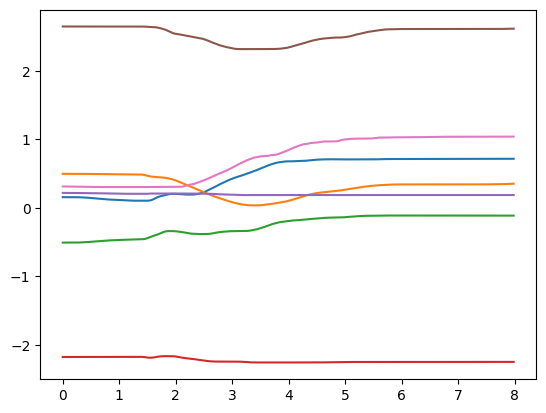

In [139]:
plt.plot(t_dec, qTestCMP2)
plt.show()

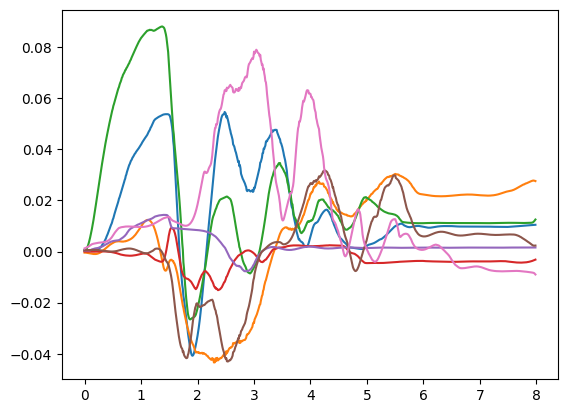

In [140]:
plt.plot(t_dec, trj_dec2-qTestCMP2)
plt.show()